# NOTEBOOK ENTREGABLE 0 SIMPSONS

En este Notebook se realiza la representación de los datos obtenidos en el contenedor de Python sobre los datos obtenidos de la [API de los simpsons][simpsons]


[//]: # (These are reference links used in the body of this note and get stripped out when the markdown processor does its job.)

[simpsons]: <https://thesimpsonsquoteapi.glitch.me/quotes>

*Esta celda que viene a continuación es necesaria para evitar que aparezca una barra de scroll en el gráfico de los personajes cuando hacemos el print de la barra de progreso.

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

Mi intención con esta celda de código (que dejo aquí copiado para seguir intentándolo en el futuro) era crear un cluster para **ejecutar en paralelo las 2 celdas con los plots**, ya que he puesto un loop para que se ejecuten en tiempo real. Ahora mismo hay que ejecutar o bien la celda del gráfico de palabras, o bien la de las imágenes de personajes, ya que Jupyter por defecto ejecuta las celdas secuencialmente.

In [ ]:
import ipyparallel as ipp

# Initializing local cluster with 2 cpus

rc = ipp.Cluster(n=2).start_and_connect_sync()

rc.wait_for_engines(n=2)


# Asigning the name %%px_1 to the first cpu of the cluster
c1 = rc[0]
c1.activate('_1')
c1.block = True

# Asigning the name %%px_2 to the second cpu of the cluster
c2 = rc[1]
c2.activate('_2')
c2.block = True

## Gráfico palabras más habituales

En el gráfico, se muestra una representación de las palabras más habituales generadas con el programa main.py que se van guardando en el archivo countedWords.csv. Una vez se ejecuta la celda, el gráfico se actualiza en tiempo real cuando el archivo .csv cambia de tamaño. <span style="color:red">Para poder ejecutar la celda con las imágenes de los personajes, es necesario parar primero esta celda. </span>


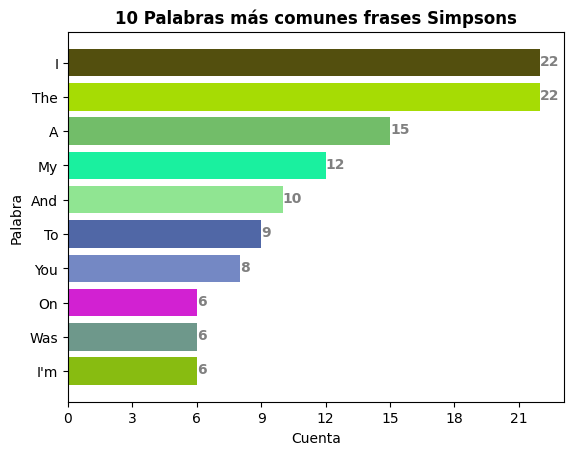

None

In [1]:
import pandas as pd
import time
import math
import os
import random
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.figure import Figure
from IPython import display


totalSize = 0 

palabrasMostar = 10 # Number of words to be shown in the plot





colorset = False # Setting bar colors on first iteration
rgb = list() # Initializing variable for random colors of bars in the plot



# This loops updates the bar graph every time the size of the countedWords.csv file changes, which means that there are new words added to the count.
while True:
    
    # The try and except have been introduced to avoid the program from crashing if the file is removed during the execution time.
    try:
        
        # Checking if file exists and if the size of the file is the same as it was before
        if os.path.isfile('results/countedWords.csv') != 0 and totalSize != os.stat('results/countedWords.csv').st_size:
            data = pd.read_csv('results/countedWords.csv')

            df = pd.DataFrame(data)

            # Sorting the words in the data frame from highest count to lowest count
            dfSorted = df.sort_values(by='Cuenta', ascending=False)



            X = list(dfSorted.iloc[:palabrasMostar, 0])
            Y = list(dfSorted.iloc[:palabrasMostar, 1])
            
            
            # Updating totalSize with new size of the .csv file
            totalSize = os.stat('results/countedWords.csv').st_size
            
            
            # Initializing Figure. I had to do it like this so I could use the method ticker.MaxNLocator to ensure that the x-axis labels are integers.
            fig, ax = plt.subplots()   
            
            
            
            plt.xlabel("Cuenta")
            plt.ylabel("Palabra")
            
            
            # This loop writes the actual count of each word besides each bar
            for i, v in enumerate(Y):
                plt.text(v, i + 0.075*palabrasMostar/10, str(v), color='gray', fontweight='bold')
                
                        
                
                
            # Setting title of graph
            plt.title(f"{len(Y)} Palabras más comunes frases Simpsons", fontweight="bold")
            
            
            # This condition ensures that the label of the bar is always inside the plotting area after the count of the first word is above 100
            if max(Y) >= 100:
                
                ax.set_xlim(0, int(max(Y)*1.1))
            
            
            
            # Defining bar colors with random combinations of rgb.      
            for i in range(palabrasMostar):
                if not colorset:
                    rgb.append([random.random(), random.random(), random.random()])


                    if i == len(X) - 1:
                        colorset = True
            
            
            # Bar chart with words in Y-axis and count in X-axis       
            ax.barh(X, Y, color=rgb)
            
            # Showing word with highest count at the top of the graph
            ax.invert_yaxis()
            
            # Ensuring that labels of X-axis are always integers
            ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
            
            
            # These two lines update de graph every time there is a new word count
            display.clear_output(wait=True)
            display.display(plt.show())
            
    
    # Exception to stop cell when stop button is pressed
    except KeyboardInterrupt:
        break     
            

    # Exception to repeat loop if reading of the file gives an error
    except:
        continue

## Imagenes personajes con nombre de directorio como título

En la siguiente celda se muestran un gráfico (subplot) con todas las imágenes de los personajes que se han descargado. Una vez se ejecuta la celda, las imágenes se actualiza en tiempo real conforme nuevas carpetas de personajes se van creando. <span style="color:red">Para poder ejecutar la celda con el gráfico de las palabras, es necesario parar primero esta celda. </span>

Procesando imágenes: 100%|██████████| 18/18 [00:00<00:00, 63.30it/s]


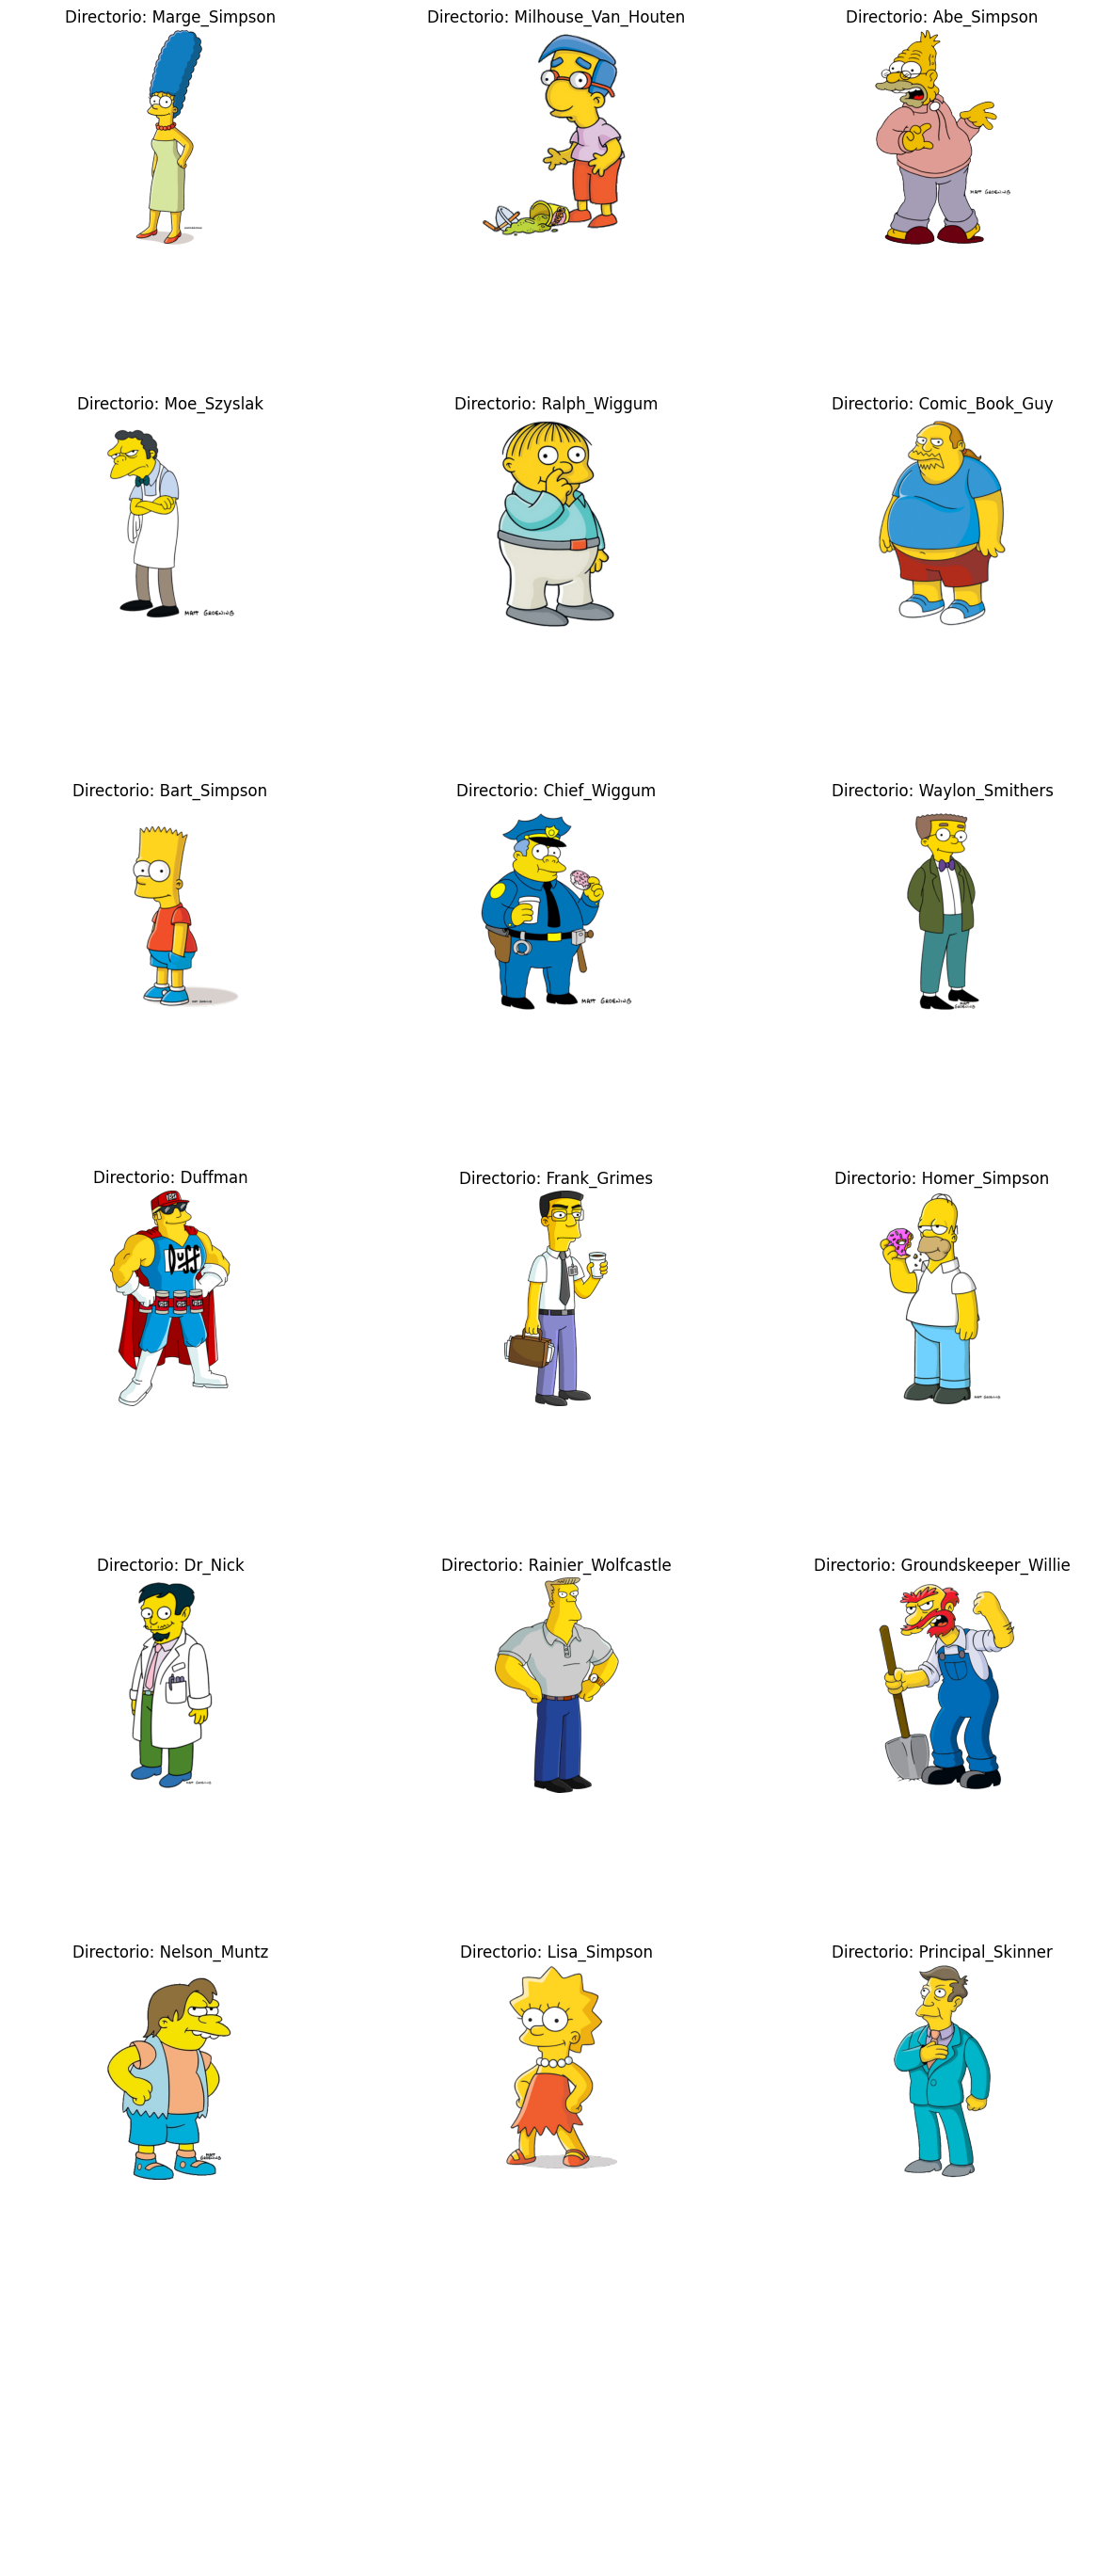

None

In [2]:
import os
import time
import math
import imghdr
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from IPython import display
from tqdm import tqdm



numcols = 3 # Define how many images per row are shown

listImages = list() # Storing existing images to check if there is new images


# This loops updates the subplot every time a new image is added to the folder of a Simpsons character
while True:
    
    # The try and except have been introduced to avoid the program from crashing if an image or folder is removed during the execution time.
    try:
    
        # Checking if results folder is not empty and if there are new characters added
        if len(next(os.walk('./results'))[1]) != 0 and len(listImages) != len(next(os.walk('./results'))[1]):
            
            listImages = next(os.walk('./results'))[1] # Updating list of images in the folder
            
            numrows = math.ceil(len(os.listdir(r'./results'))/numcols) # Equation to obtain number of rows of the subplot
                            
            fig, ax  = plt.subplots(numrows, numcols, sharex=False, sharey=False, figsize=(numcols*5, numrows*5), squeeze=False) # Squeeze=False to ensure a 2-D Array
            
            fig.subplots_adjust(hspace=0.8)  # Adding a vertical spacing between rows of 0.3
            
            # Turn all axis off
            [axi.set_axis_off() for axi in ax.ravel()]
            
            # Initializing count of rows and columns
            row = 0
            col = 0     
        
        
            # If there are more than 15 images, print a loader to help the user see that the code is working
            if len(listImages) >= 15:
                imageBar = tqdm(listImages)
                imageBar.set_description("Procesando imágenes")
            else:
                imageBar = listImages
            
            
            for i in imageBar:
                
                
                # This while loop is necesary to check if the png image is fully downloaded to avoid the cell from crashing if it's still downloading it from the url
                while imghdr.what('./results/'+i+'/'+i+'.png') != 'png' or os.path.exists('./results/'+i+'/'+i+'.png') == False:
                    continue
                
                else:
                    
                    # Getting image
                    image = mpimg.imread('./results/'+i+'/'+i+'.png')
                    
                    ax[row,col].use_sticky_edges = False
                    ax[row,col].imshow(image)
                    ax[row,col].set_title(f"Directorio: {i}")
                    
                    
                    # Moving to the next position of the subplot to show the next character image.
                    if (col + 1)  % numcols == 0:
                        col = 0
                        row += 1
                    else:
                        col += 1
            
            # These two lines update de subplot with images every time there is a new image
            display.display(plt.show())
            display.clear_output(wait=True)    
                
    
    
    # Exception to stop cell when stop button is pressed
    except KeyboardInterrupt:
        break     
            
    # Exception to repeat loop if reading of the file gives an error
    except Exception as e:
        print(e)
        continue